## **1 & 2. Download and Load the dataset**

In [28]:

import pandas as pd
import io
 
df = pd.read_csv('/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **3. Perform Visualization**

**i) Univariate Analysis**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77585d6810>]],
      dtype=object)

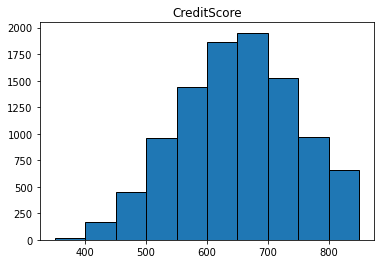

In [3]:
import matplotlib.pyplot as plt

df.hist(column='CreditScore', grid=False, edgecolor='black')

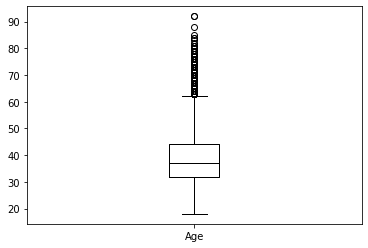

In [5]:
df.boxplot(column=['Age'], grid=False, color='black')

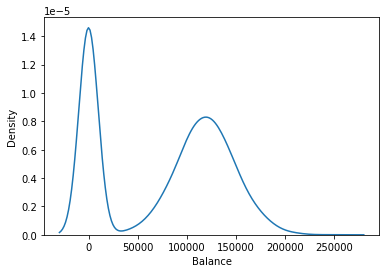

In [6]:
import seaborn as sns

sns.kdeplot(df['Balance'])

**ii) Bi Variate Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


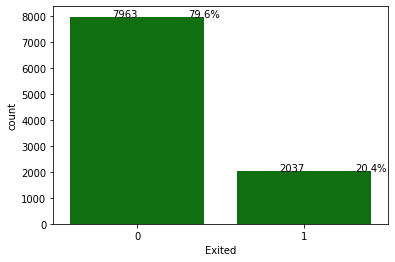

In [16]:
ax=sns.countplot(df['Exited'],color="Green")
total=float(len(df))
for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_height()/total)
        x=p.get_x() + p.get_width()
        y=p.get_height()
        ax.annotate(percent,(x,y),ha='center')
        ax.annotate(y, (x - + p.get_width() +0.25, y+0.01))
plt.show()

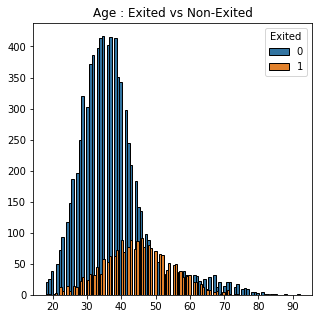

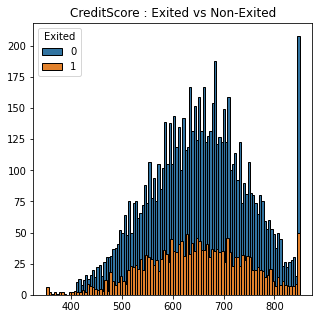

In [14]:
df_exited=df[df['Exited']==1]
df_not_exited=df[df['Exited']==0]
Excepted_col=['Age','CreditScore']
for column in Excepted_col:
    plt.figure(figsize=(5,5))
    plt.hist(x=column,bins=100,data=df_not_exited,edgecolor='black',color='#3274a1')
    plt.hist(x=column,bins=100,data=df_exited,edgecolor='black',color='#e1812c')
    plt.title(column+' : Exited vs Non-Exited')
    plt.legend([0,1],title='Exited')

**iii) Multi variate Analysis**

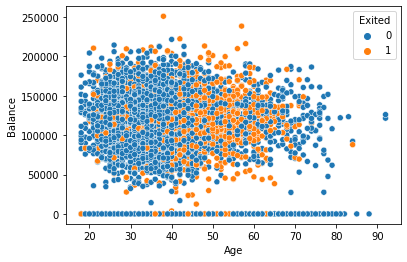

In [12]:
sns.scatterplot(data=df, x="Age", y="Balance", hue="Exited")


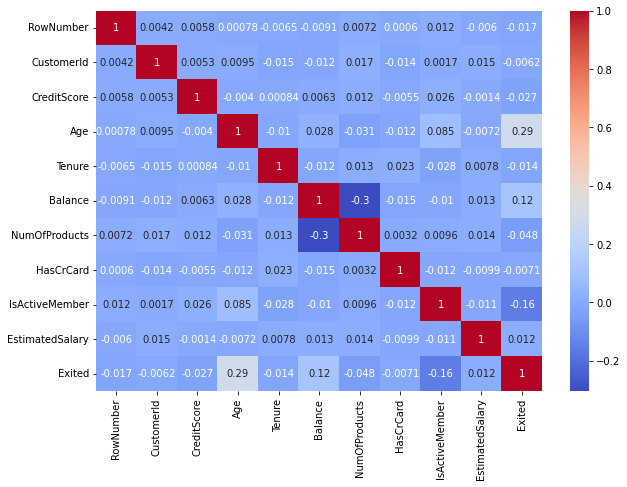

In [13]:
#HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

## **4. Perform Descriptive Analysis**

In [18]:
df.describe(include = 'all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## **5. Handle Missing Values**

In [19]:
df.isnull()
#shows no missing value

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


## **6. Check for Categorical columns and perform encoding**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

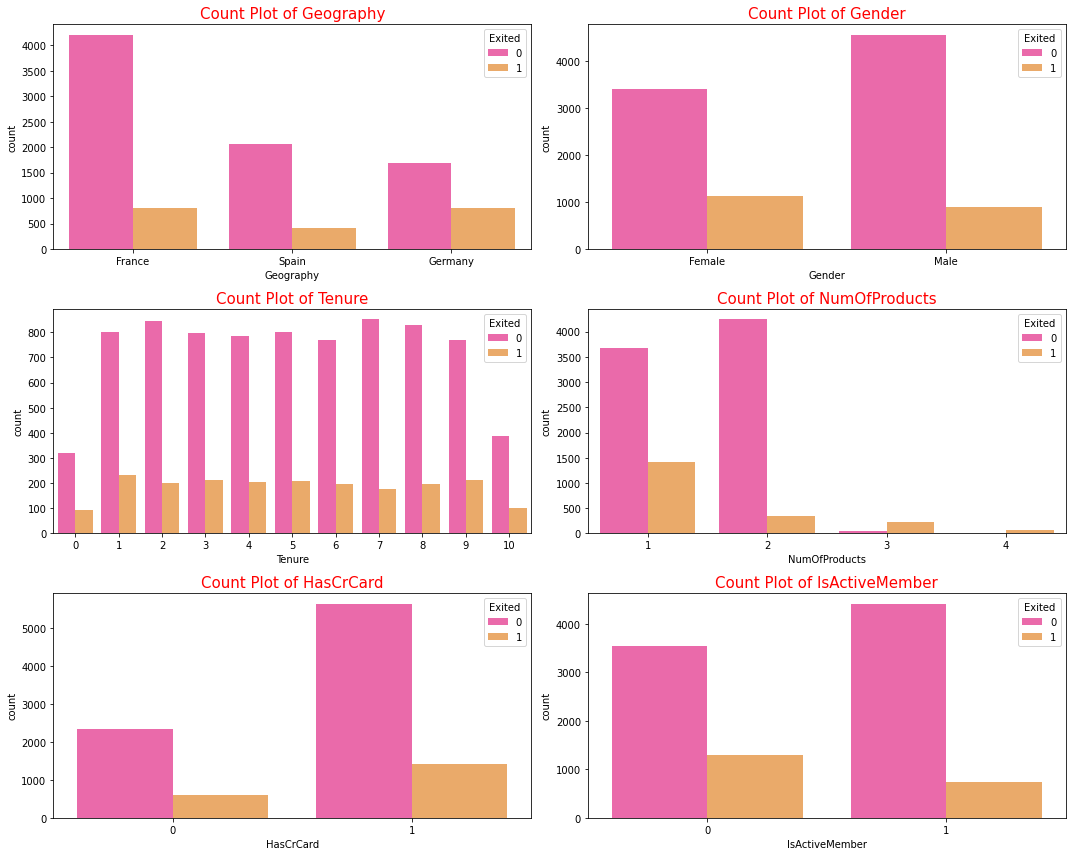

In [24]:
#visualization of categorical features
fig, ax = plt.subplots(3, 2, figsize = (15, 12))
plt.title("Visualization")
sns.countplot('Geography', hue = 'Exited', data = df, ax = ax[0][0],palette='spring')
sns.countplot('Gender', hue = 'Exited', data = df, ax = ax[0][1],palette='spring')
sns.countplot('Tenure', hue = 'Exited', data = df, ax = ax[1][0],palette='spring')
sns.countplot('NumOfProducts', hue = 'Exited', data = df, ax = ax[1][1],palette='spring')
sns.countplot('HasCrCard', hue = 'Exited', data = df, ax = ax[2][0],palette='spring')
sns.countplot('IsActiveMember', hue = 'Exited', data = df, ax = ax[2][1],palette='spring')

ax[0][0].set_title('Count Plot of Geography',color='red',fontsize=15)
ax[0][1].set_title('Count Plot of Gender',color='red',fontsize=15)
ax[1][0].set_title('Count Plot of Tenure',color='red',fontsize=15)
ax[1][1].set_title('Count Plot of NumOfProducts',color='red',fontsize=15)
ax[2][0].set_title('Count Plot of HasCrCard',color='red',fontsize=15)
ax[2][1].set_title('Count Plot of IsActiveMember',color='red',fontsize=15)

plt.tight_layout()
plt.show()

In [29]:
#Label Encoding of Categ features
df['Geography']=df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Gender']=df['Gender'].map({'Male':0,'Female':1})
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10,0


## **8. Splitting Data into Dependent and Independent Variables**

In [31]:
X=df.drop('Exited',axis=1)
Y=df['Exited']
X

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,1,1,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,1,1,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58
9998,9999,15682355,Sabbatini,772,2,0,42,3,75075.31,2,1,0,92888.52


In [32]:
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

## **9. Scale the independent Variables**

In [35]:
#scaling 
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,0.538,0,1,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,2,15647311,Hill,0.516,1,1,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,3,15619304,Onio,0.304,0,1,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,4,15701354,Boni,0.698,0,1,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,5,15737888,Mitchell,1.000,1,1,0.337838,0.2,0.500246,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,0.842,0,0,0.283784,0.5,0.000000,2,1,0,0.481341,0
9996,9997,15569892,Johnstone,0.332,0,0,0.229730,1.0,0.228657,1,1,1,0.508490,0
9997,9998,15584532,Liu,0.718,0,1,0.243243,0.7,0.000000,1,0,1,0.210390,1
9998,9999,15682355,Sabbatini,0.844,2,0,0.324324,0.3,0.299226,2,1,0,0.464429,1


## **10. Split into train and Test data**

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=12,stratify=Y)
X_train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
3497,3498,15588944,Maughan,456,0,1,63,1,165350.61,2,0,0,140758.07
2675,2676,15682890,Woronoff,745,2,0,38,5,65095.41,2,1,1,140197.42
8169,8170,15689517,Hales,635,0,0,27,3,127009.83,1,1,0,161909.95
8010,8011,15787756,Nkemdirim,467,2,0,51,10,114514.71,2,1,0,177784.68
1463,1464,15669293,Hovell,517,0,0,37,5,113308.84,1,0,1,31517.16
